In [1]:
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2
import cProfile
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time
import mplFunctions as mpl
import wfmFunctions as wfm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
print(time.strftime("%d/%m/%Y"))
print(time.strftime("%H:%M:%S"))


/Applications/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


07/10/2016
12:31:20


In [2]:
%more ../Config/DIOMIRA_NA_ZLIB_test.csv

In [11]:
cd ../Cities/

/Users/Gonzalo/github/IC/Cities


In [15]:
run DIOMIRA.py -c ../Config/DIOMIRA_default.csv

Debug level = INFO
input path =/Users/Gonzalo/github/IC/data/; output path = /Users/Gonzalo/github/IC/data/; file_in =in0.h5 file_out =out0.h5
first event = 0 last event = 100 nof events requested = 100 
Compression library = zlib Compression level = 1 
nof PMTs = 12 nof  SiPMs = 1789 nof events in input DST = 100 
lof SiPM WF = 800000 lof PMT WF (MC) = 800 lof PMT WF (FEE) = 32000
Initializing SiPMNoiseSampler DONE
-->event number =0


/Users/Gonzalo/github/IC/Utilities/RandomSampling3.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  while None in self.probs:
/Users/Gonzalo/github/IC/Utilities/RandomSampling3.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self.probs.pop(self.probs.index(None))


-->event number =1
-->event number =2
-->event number =3
-->event number =4
-->event number =5
-->event number =6
-->event number =7
-->event number =8
-->event number =9
-->event number =10
-->event number =11
-->event number =12
-->event number =13
-->event number =14
-->event number =15
-->event number =16
-->event number =17
-->event number =18
-->event number =19
-->event number =20
-->event number =21
-->event number =22
-->event number =23
-->event number =24
-->event number =25
-->event number =26
-->event number =27
-->event number =28
-->event number =29
-->event number =30
-->event number =31
-->event number =32
-->event number =33
-->event number =34
-->event number =35
-->event number =36
-->event number =37
-->event number =38
-->event number =39
-->event number =40
-->event number =41
-->event number =42
-->event number =43
-->event number =44
-->event number =45
-->event number =46
-->event number =47
-->event number =48
-->event number =49
-->event number =50
-->event 

In [16]:
cd ../data/

/Users/Gonzalo/github/IC/data


In [17]:
%ls .

NoiseSiPM_NEW.dat
NoiseSiPM_NEW.root
Untitled.ipynb
dst_NEXT_v0_08_02_Kr_ACTIVE_0_0_5bar_MCRD_10000.root.h5*
in0.h5@
o.h5
out0.h5


In [18]:
h5f = tb.open_file('out0.h5')
print(h5f)

out0.h5 (File) ''
Last modif.: 'Fri Oct  7 12:53:40 2016'
Object Tree: 
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
/MC/MCTracks (Table(806,), zlib(1)) ''
/RD (Group) ''
/RD/pmtrwf (EArray(100, 12, 32000), shuffle, zlib(1)) ''
/RD/sipmrwf (EArray(100, 1789, 800), shuffle, zlib(1)) ''
/RD/sipmrwfnoiseless (EArray(100, 1789, 800), shuffle, zlib(1)) ''
/Sensors (Group) ''
/Sensors/DataPMT (Table(12,)) ''
/Sensors/DataSiPM (Table(1789,)) ''
/TWF (Group) ''
/TWF/TWF (Table(1420,), shuffle, zlib(1)) 'Store for TWF'



In [19]:
wfm = h5f.root.RD.sipmrwf            # Noisefull waveform
wfmnl = h5f.root.RD.sipmrwfnoiseless # Noiseless waveform
print(wfm.shape,wfmnl.shape)         # Nevts Nsipms Nsamples

(100, 1789, 800) (100, 1789, 800)


In [20]:
def plotBest(evt = 0):
    #Find SiPM with greatest peak
    maxsipm = np.unravel_index(wfm[evt,:,:].argmax(),wfm[evt,:,:].shape)[0]
    print("SiPM with greatest peak is at index {} with ID {}".format(maxsipm,h5f.root.Sensors.DataSiPM[maxsipm][0]))
    # Plot noisy waveform in red and noiseless waveform in blue
    plt.plot(wfm[evt,maxsipm,:])
    plt.plot(wfmnl[evt,maxsipm,:])

In [21]:
plt.rcParams['figure.figsize'] = (15, 10)

In [22]:
def plotBestGroup(evt = 0, nsipms = 20, nrows = 4, ncols = 5):
    #Find SiPM with greatest peak
    #threshold = wfm[evt,:,:].max() * 0.08
    #print(threshold)
    #sipms = [ (wfm[evt,sipm],wfmnl[evt,sipm]) for sipm in range(wfm.shape[1]) if max(wfm[evt,sipm])>threshold ]
    sipms = sorted( zip(wfm[evt],wfmnl[evt]), key = lambda x: max(x[0]), reverse = True )[:nsipms]
    plt.figure(figsize=(45,60))
    f, axes = plt.subplots(nrows, ncols)
    i,j=0,0
    for sipm_wfm, sipm_wfm_nl in sipms:
        
        if j==ncols:
            i,j = i+1,0
        axes[i,j].plot(sipm_wfm)
        axes[i,j].plot(sipm_wfm_nl)
        j += 1
        
    [ plt.setp([a.get_xticklabels() for a in axes[i, :]], visible=False) for i in range(0,nrows-1) ]
    [ plt.setp([a.get_yticklabels() for a in axes[:, i]], visible=False) for i in range(1,nrows+1) ]

SiPM with greatest peak is at index 331 with ID 6011


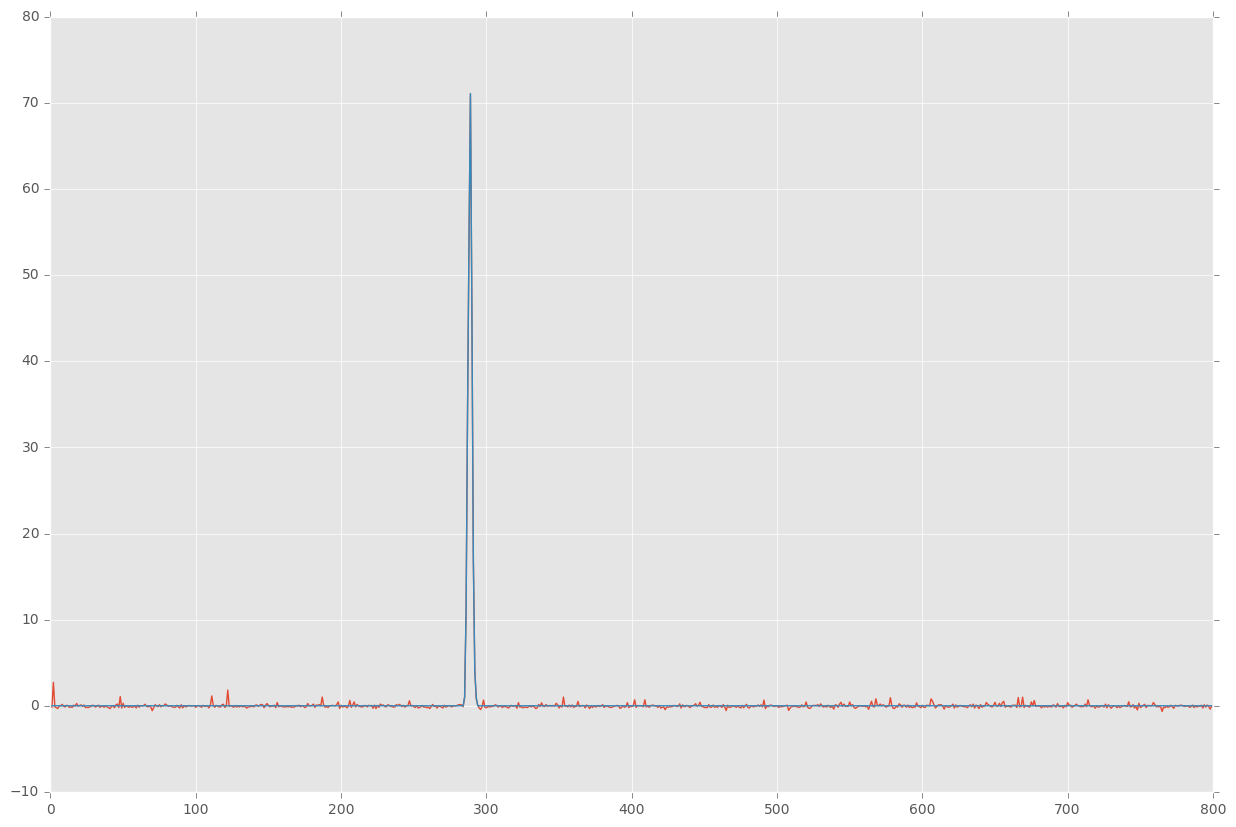

In [23]:
plotBest(0)

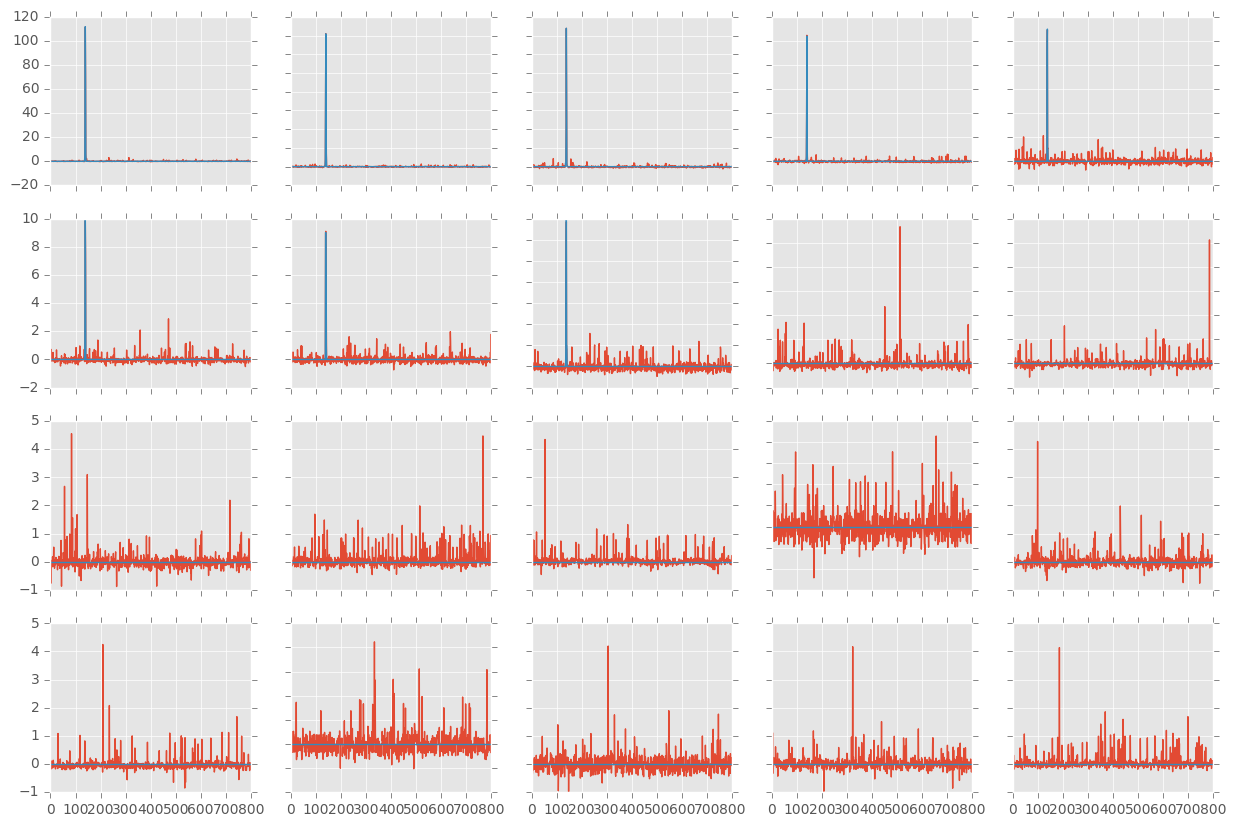

In [24]:
plotBestGroup(6)

SiPM with greatest peak is at index 1280 with ID 21002


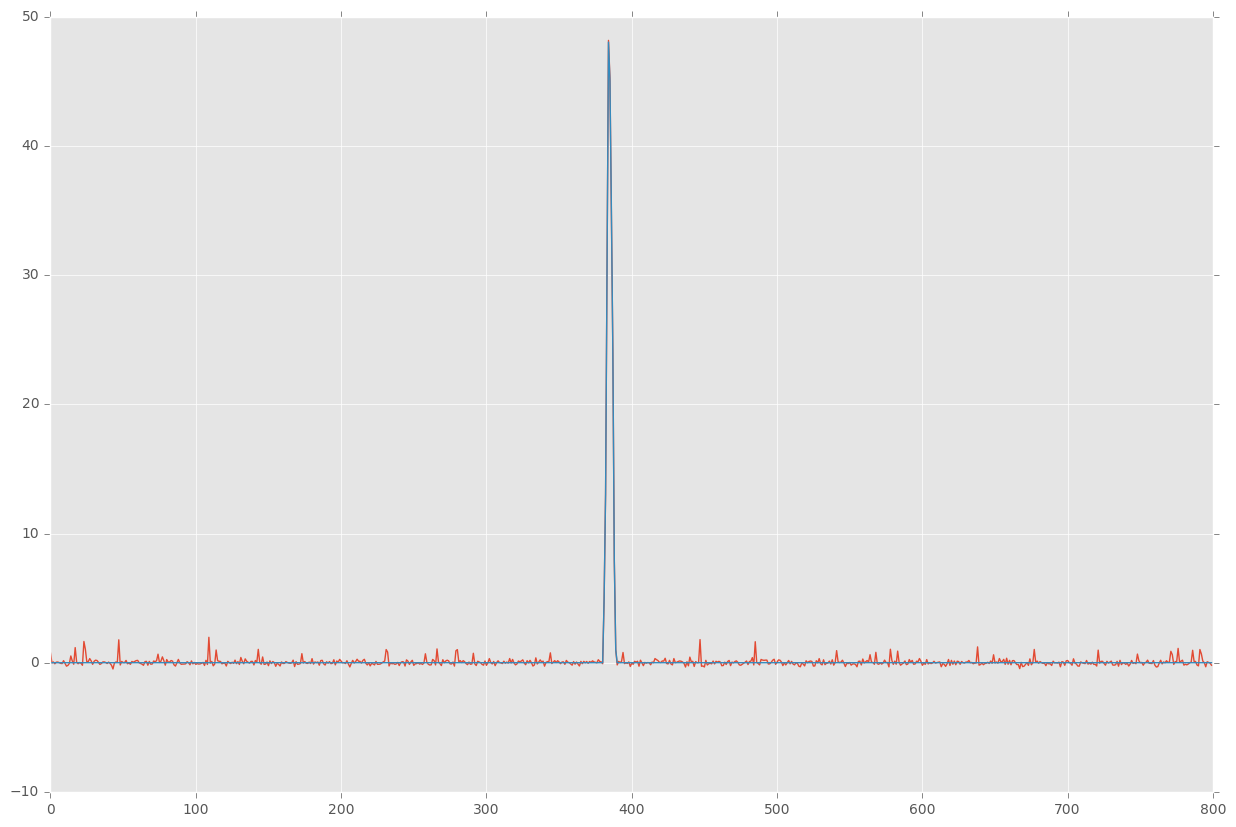

In [25]:
plotBest(1)